# 2. 매년 종가와 수출량의 상관관계

📌 프로젝트 기획 의도 및 목표      
      
1. 프로젝트 개요    
본 프로젝트는 매년 주식 시장의 평균 종가(Close)와 국가 총 수출액(Total Export) 간의 관계를 분석하여, 특정 산업의 성장과 국가 경제 활동 간의 상관관계를 탐색하는 것을 목표로 진행      
이를 통해, 개별 산업이 수출 증가에 따라 어떤 영향을 받는지를 시각적으로 분석하고, 기업과 투자자들에게 데이터 기반의 의사결정 지표를 제공    
      
2. 프로젝트 목표        
✅ 주요 산업별 주가 변동 분석        
자동차, 은행, 데이터, 에너지, 필수 소비재, 헬스케어, 반도체, 철강 등 8개 주요 산업군의 연평균 종가 변화를 분석     
산업별 주가가 특정 연도에 어떻게 변화했는지를 파악하여, 산업 트렌드 및 시장 흐름을 이해하는 데 활용     
✅ 수출량과 주식시장 간의 관계 분석         
국가 총 수출액의 변화가 특정 산업에 미치는 영향을 탐색     
글로벌 경제 환경, 정책 변화, 무역협정 등이 산업 성장과 주가 변동성에 미치는 영향을 분석하는 데 활용될 수 있음을 파악    
✅ 기업의 전략적 의사결정 지원           
기업들이 수출 의존도가 높은 산업의 경우, 수출 동향을 기반으로 한 투자 및 경영 전략 수립이 가능하도록 지원     
경제 변동성과 산업별 민감도를 고려하여, 장기적인 시장 예측 및 투자 전략을 세울 수 있도록 데이터 인사이트를 제공     
     
📊 최종 분석 결과 및 인사이트      
1. 산업별 평균 종가 변화     
특정 산업(예: 반도체, 자동차)은 수출량 증가와 함께 평균 종가가 상승하는 경향을 확인     
반면, 은행 및 필수 소비재(essential consumer) 산업은 상대적으로 낮은 변동성 확인     
2018년~2019년 글로벌 무역전쟁 시기에는 대부분 산업에서 하락세가 관찰되었으며, 이후 회복세를 보인 산업이 있는 반면, 일부는 지속적인 하락을 확인    
      
2. 총 수출액 변화와 주가 간의 상관관계     
총 수출액은 전반적으로 상승하는 경향을 보이지만, 일부 연도(예: 2015년, 2020년)에는 하락세를 확인    
특정 연도에 수출량 감소와 동시에 특정 산업(철강, 에너지)의 평균 종가도 하락하는 패턴을 관찰      
반도체와 자동차 산업은 수출량 증가와 함께 주가가 동반 상승하는 경향을 나타내어, 글로벌 수출 시장과 밀접한 관련이 있음을 시사         
      
🔍 결론 및 시사점        
본 프로젝트를 통해 수출량과 산업별 평균 종가 간의 관계를 데이터 기반으로 분석      
이 분석 결과는 기업의 수출 전략, 투자자의 산업 선택, 정책 결정자들의 경제 정책 수립에 활용 가능       
       
특히, 다음과 같은 전략적 인사이트를 제공      
✅ 수출 중심 산업(예: 반도체, 자동차) → 수출 정책 변화에 민감하므로 글로벌 경제 트렌드 모니터링 필수      
✅ 내수 중심 산업(예: 필수 소비재, 은행) → 경제 위기 시 방어적 투자 포트폴리오 구성 가능       
✅ 특정 연도에 주가 및 수출량 변동성 증가 → 경제 이벤트(예: 금융 위기, 팬데믹, 무역 분쟁)와의 상관관계 추가 분석 필요          
       
이러한 분석을 바탕으로, 향후 수출량 예측과 산업별 주가 변동성을 조합한 예측 모델을 개발 가능

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['font.family'] = 'Malgun Gothic'

- 자동차, 은행, 데이터, 에너지, 필수 소비재, 헬스케어, 반도체, 철강 필요 데이터 정리

In [ ]:
file_path="data/automobile.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_automobile.csv"
df_Year.to_csv(output_path, index=False)


file_path="data/bank.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_bank.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/data_stock.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_data_stock.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/energy.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_energy.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/essential_consumer.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_essential_consumer.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/healthcare.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_healthcare.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/semiconduct.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_semiconduct.csv"
df_Year.to_csv(output_path, index=False)



file_path="data/steel.csv"
df = pd.read_csv(file_path)

# Date 컬럼을 날짜 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 월별 그룹화 및 Close 평균, Volume 합 구하기
df_grouped = df.groupby(df["Date"].dt.year).agg(
    {"Close": "mean"}
).reset_index()

# Date -> Year 변경
df_grouped.rename(columns={"Date": "Year"}, inplace=True)
df_grouped

df_Year = df_grouped[df_grouped["Year"]>=2011]
df_Year

# CSV 파일로 저장
output_path = "data/2011_steel.csv"
df_Year.to_csv(output_path, index=False)

In [8]:
df_automobile = pd.read_csv("data/2011_automobile.csv")
df_bank = pd.read_csv("data/2011_bank.csv")
df_data_stock = pd.read_csv("data/2011_data_stock.csv")
df_energy = pd.read_csv("data/2011_energy.csv")
df_essential_consumer = pd.read_csv("data/2011_essential_consumer.csv")
df_healthcare = pd.read_csv("data/2011_healthcare.csv")
df_semiconduct = pd.read_csv("data/2011_semiconduct.csv")
df_steel = pd.read_csv("data/2011_steel.csv")

- 수출량 데이터 정리

In [4]:
df_export=pd.read_excel("data/K_stat_무역통계_한국무역협회_final.xls", header=2)

# 칼럼명 변경
df_export.rename(columns={"년도\n(순위)": "Year", "총수출액\n(백만불)": "Total_export"}, inplace=True)

In [5]:
# "Year" 컬럼을 정수형으로 변환
df_export["Year"] = df_export["Year"].astype(str).str.extract(r'(\d{4})')  # 연도 추출
df_export["Year"] = df_export["Year"].astype(int)  # 정수형 변환

# 2011년부터 2025년 데이터만 필터링
df_filtered = df_export[(df_export["Year"] >= 2011)&(df_export["Year"]<2025)]

# 필요한 컬럼만 선택
df_final = df_filtered[["Year", "Total_export"]]

- 산업별 종가와 한국 수출량 그래프 확인

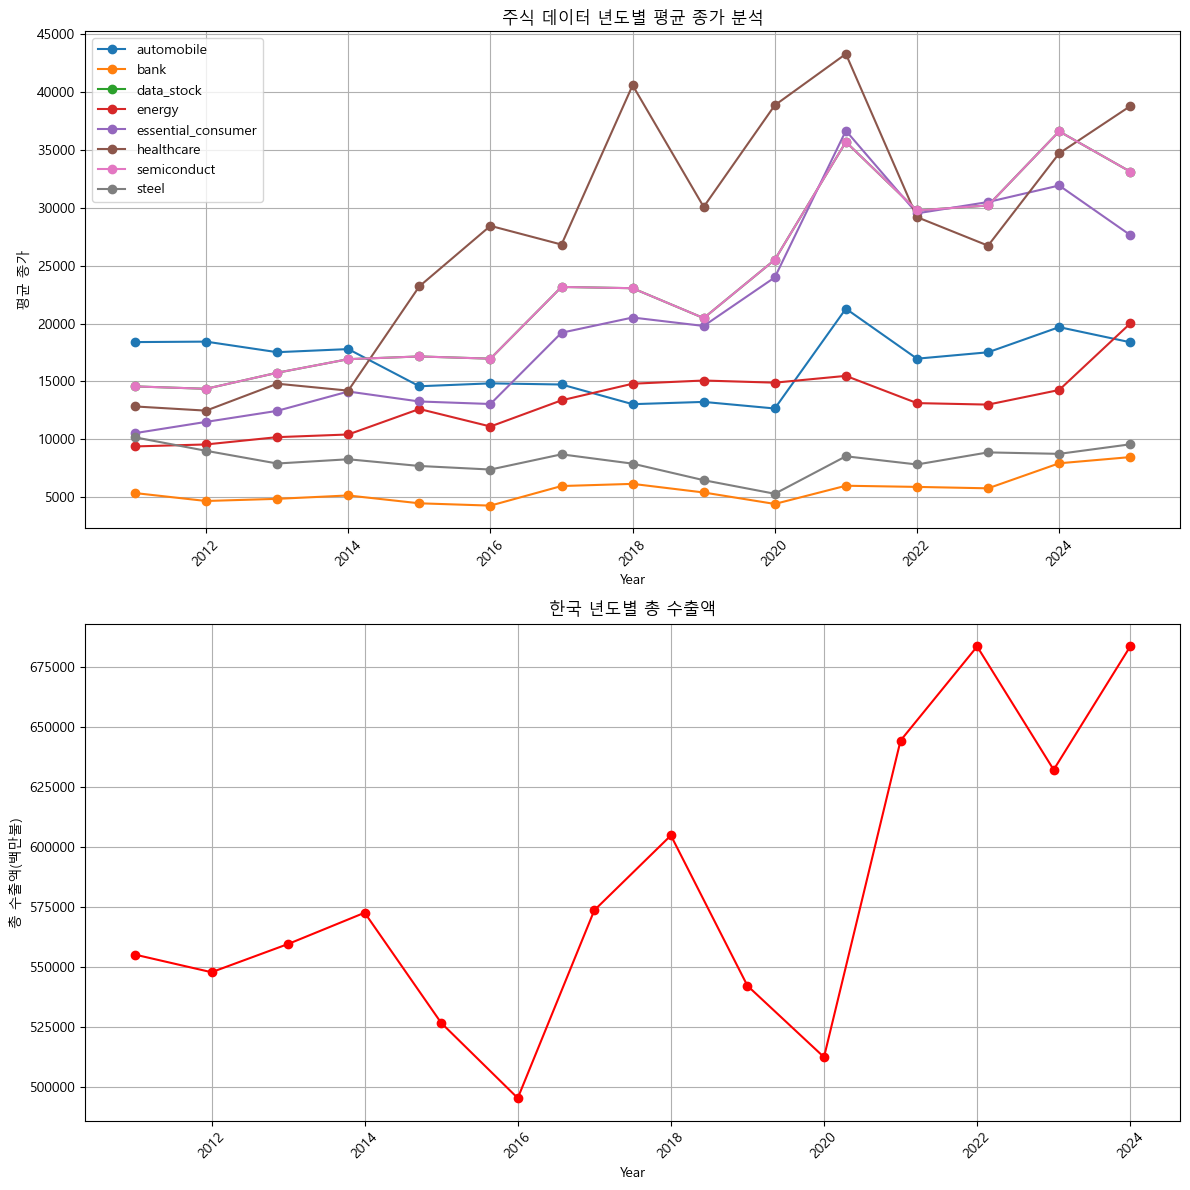

In [9]:
# 📌 **subplot 설정**
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # 2개의 그래프 (2행 1열)

# 📌 **첫 번째 그래프: 주식 데이터 년별 평균 종가 분석**
axes[0].plot(df_automobile['Year'], df_automobile['Close'], marker='o', linestyle='-', label='automobile')
axes[0].plot(df_bank['Year'], df_bank['Close'], marker='o', linestyle='-', label='bank')
axes[0].plot(df_data_stock['Year'], df_data_stock['Close'], marker='o', linestyle='-', label='data_stock')
axes[0].plot(df_energy['Year'], df_energy['Close'], marker='o', linestyle='-', label='energy')
axes[0].plot(df_essential_consumer['Year'], df_essential_consumer['Close'], marker='o', linestyle='-', label='essential_consumer')
axes[0].plot(df_healthcare['Year'], df_healthcare['Close'], marker='o', linestyle='-', label='healthcare')
axes[0].plot(df_semiconduct['Year'], df_semiconduct['Close'], marker='o', linestyle='-', label='semiconduct')
axes[0].plot(df_steel['Year'], df_steel['Close'], marker='o', linestyle='-', label='steel')

# 📌 **첫 번째 그래프 설정**
axes[0].set_title('주식 데이터 년도별 평균 종가 분석')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('평균 종가')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 📌 **두 번째 그래프: 한국 년도별 총 수출액**
axes[1].plot(df_final['Year'], df_final['Total_export'], marker='o', linestyle='-', color='red')

# 📌 **두 번째 그래프 설정**
axes[1].set_title('한국 년도별 총 수출액')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('총 수출액(백만불)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 📌 **레이아웃 조정**
plt.tight_layout()

# 📌 **그래프 출력**
plt.show()